In [1]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
from string import punctuation
import re
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
def preprocess_text(text):
    stopwords_and_punctuation = set(stopwords.words('english')) | set(punctuation)
    stemmer = SnowballStemmer("english")

    text = re.sub('[^a-zA-Z]', ' ', text)
    text = text.lower()
    text = word_tokenize(text)
    text = [stemmer.stem(word) for word in text if word not in stopwords_and_punctuation]

    return text

In [3]:
df = pd.read_csv("C:/Users/Dell/OneDrive/Desktop/book/English_Dataset.csv")

df.head(10)

,Id,Comment,Review
0,1,Great shot! 😍,1
1,2,Love this picture! ❤️,1
2,3,Amazing content! 👌,1
3,4,Fantastic post! 😊,1
4,5,Beautiful capture!,1
5,6,Absolutely stunning! 😍,1
6,7,Incredible work! 👏,1
7,8,This is awesome! 🙌,1
8,9,So inspiring! 💫,1
9,10,Absolutely love it! 💖,1


In [4]:
print("Dataset Information:")
df.info()
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1082 entries, 0 to 1081
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Id       1082 non-null   int64 
 1   Comment  1082 non-null   object
 2   Review   1082 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 25.5+ KB

Missing Values:
Id         0
Comment    0
Review     0
dtype: int64


In [5]:
df['Comment_Cleaned'] = df['Comment'].apply(lambda x: ' '.join(preprocess_text(x)))
df.head(10)

,Id,Comment,Review,Comment_Cleaned
0,1,Great shot! 😍,1,great shot
1,2,Love this picture! ❤️,1,love pictur
2,3,Amazing content! 👌,1,amaz content
3,4,Fantastic post! 😊,1,fantast post
4,5,Beautiful capture!,1,beauti captur
5,6,Absolutely stunning! 😍,1,absolut stun
6,7,Incredible work! 👏,1,incred work
7,8,This is awesome! 🙌,1,awesom
8,9,So inspiring! 💫,1,inspir
9,10,Absolutely love it! 💖,1,absolut love


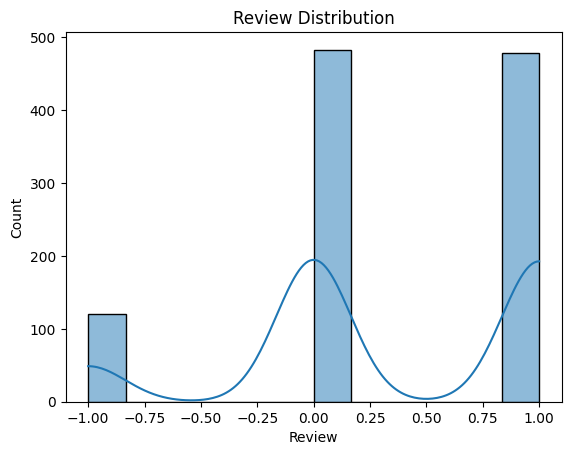

In [6]:
sns.histplot(df['Review'], kde=True).set_title("Review Distribution")
plt.show()

In [7]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['Comment_Cleaned'])
y = df['Review']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)


In [9]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [10]:
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        40
           0       0.89      0.96      0.92       132
           1       0.96      0.90      0.93       153

    accuracy                           0.94       325
   macro avg       0.95      0.95      0.95       325
weighted avg       0.94      0.94      0.94       325



In [11]:
new_review = ["It's okay, I suppose."]

new_review_tokens = ' '.join(preprocess_text(new_review[0]))
new_review_tokens_transformed = tfidf.transform([new_review_tokens])


In [12]:
def print_sentiment_label(label):
    if label == 1:
        return "Positive"
    elif label == 0:
        return "Negative"
    elif label == -1:
        return "Neutral"
    else:
        return "Unknown"

predicted_label = model.predict(new_review_tokens_transformed)[0]
print("Predicted Sentiment:", print_sentiment_label(predicted_label))


Predicted Sentiment: Neutral
